In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Importing necessary libraries for data analysis, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Aqi.csv')

# Preview the dataset
print("Dataset Preview:")
print(data.head())

# Display dataset information
print("\nDataset Information:")
print(data.info())

# Display basic statistics of the dataset
print("\nDataset Statistics:")
print(data.describe())

Dataset Preview:
   RecordID         AQI        PM10      PM2_5         NO2        SO2  \
0         1  187.270059  295.853039  13.038560    6.639263  66.161150   
1         2  475.357153  246.254703   9.984497   16.318326  90.499523   
2         3  365.996971         NaN  23.111340   96.317811  17.875850   
3         4  299.329242         NaN  14.273403   81.234403  48.323616   
4         5   78.009320         NaN        NaN  121.235461  90.866167   

           O3  Temperature   Humidity  WindSpeed  RespiratoryCases  \
0   54.624280     5.150335  84.424344   6.137755                 7   
1  169.621727     1.543378  46.851415   4.521422                10   
2    9.006794     1.169483  17.806977  11.157384                13   
3   93.161033    21.925276  99.473373  15.302500                 8   
4  241.795138     9.217517  24.906837  14.534733                 9   

   CardiovascularCases  HospitalAdmissions  HealthImpactScore  \
0                    5                   1          97.244

In [4]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Fill or drop missing values (example: using mean for numerical columns)
for column in data.select_dtypes(include=np.number).columns:
    if data[column].isnull().sum() > 0:
        data[column].fillna(data[column].mean(), inplace=True)

# Fill or drop missing categorical values (example: using mode)
for column in data.select_dtypes(include=['object']).columns:
    if data[column].isnull().sum() > 0:
        data[column].fillna(data[column].mode()[0], inplace=True)

print("\nMissing Values After Handling:")
print(data.isnull().sum())


Missing Values:
RecordID                0
AQI                     0
PM10                   60
PM2_5                  72
NO2                    64
SO2                    61
O3                     73
Temperature            40
Humidity                0
WindSpeed               0
RespiratoryCases        0
CardiovascularCases     0
HospitalAdmissions      0
HealthImpactScore       0
HealthImpactClass       0
dtype: int64

Missing Values After Handling:
RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64


<ipython-input-4-1f145fbd7376>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


In [5]:
# Remove duplicates if any
data.drop_duplicates(inplace=True)

# Standardize column names (optional but helpful for consistency)
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

print("\nData after basic cleaning:")
print(data.head())


Data after basic cleaning:
   recordid         aqi        pm10       pm2_5         no2        so2  \
0         1  187.270059  295.853039   13.038560    6.639263  66.161150   
1         2  475.357153  246.254703    9.984497   16.318326  90.499523   
2         3  365.996971  148.790654   23.111340   96.317811  17.875850   
3         4  299.329242  148.790654   14.273403   81.234403  48.323616   
4         5   78.009320  148.790654  100.236300  121.235461  90.866167   

           o3  temperature   humidity  windspeed  respiratorycases  \
0   54.624280     5.150335  84.424344   6.137755                 7   
1  169.621727     1.543378  46.851415   4.521422                10   
2    9.006794     1.169483  17.806977  11.157384                13   
3   93.161033    21.925276  99.473373  15.302500                 8   
4  241.795138     9.217517  24.906837  14.534733                 9   

   cardiovascularcases  hospitaladmissions  healthimpactscore  \
0                    5                   

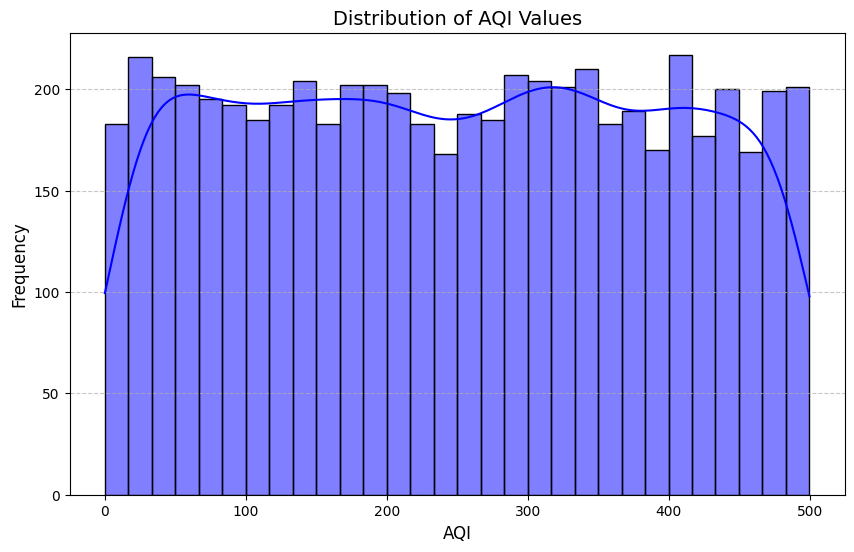

In [6]:
# Plot the distribution of AQI values
plt.figure(figsize=(10, 6))
sns.histplot(data['aqi'], kde=True, bins=30, color='blue')
plt.title('Distribution of AQI Values', fontsize=14)
plt.xlabel('AQI', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

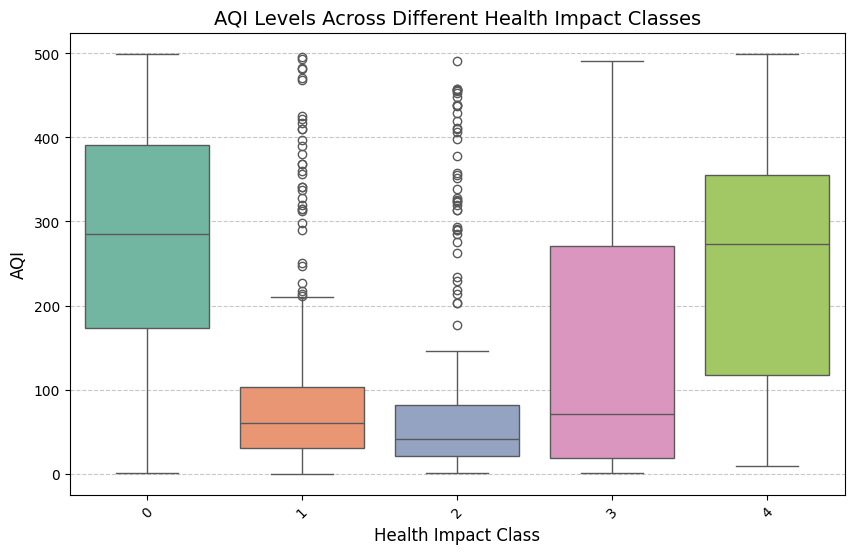

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='healthimpactclass', y='aqi', hue='healthimpactclass', data=data, palette='Set2', dodge=False)
plt.title('AQI Levels Across Different Health Impact Classes', fontsize=14)
plt.xlabel('Health Impact Class', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend([],[], frameon=False)
plt.show()

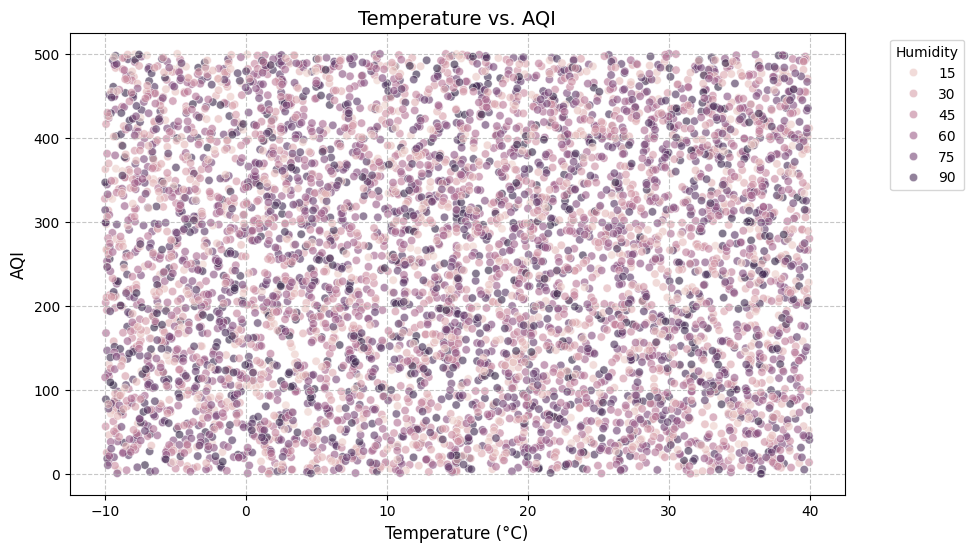

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='aqi', hue='humidity', data=data, alpha=0.6)
plt.title('Temperature vs. AQI', fontsize=14)
plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.legend(title='Humidity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

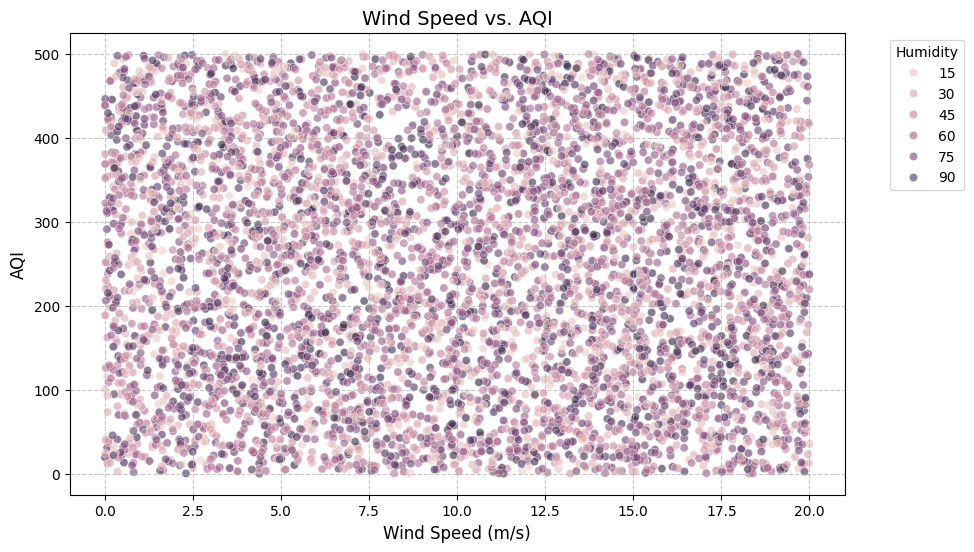

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='windspeed', y='aqi', hue='humidity', data=data, alpha=0.6)
plt.title('Wind Speed vs. AQI', fontsize=14)
plt.xlabel('Wind Speed (m/s)', fontsize=12)
plt.ylabel('AQI', fontsize=12)
plt.legend(title='Humidity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(linestyle='--', alpha=0.7)
plt.show()


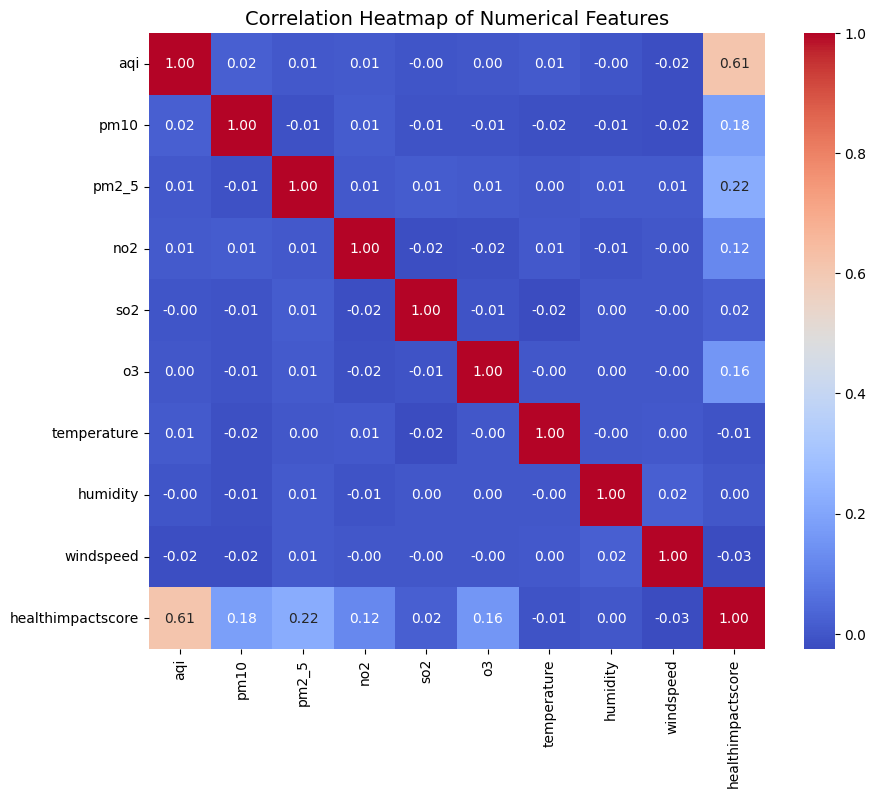

In [10]:
# Select numerical columns for correlation
numerical_features = ['aqi', 'pm10', 'pm2_5', 'no2', 'so2', 'o3', 'temperature', 'humidity', 'windspeed', 'healthimpactscore']
correlation_matrix = data[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.show()

In [11]:
# Define bins for AQI (example: low, moderate, high pollution levels)
bins = [0, 50, 100, np.inf]  # Adjust thresholds as needed
labels = [0, 1, 2]  # 0: low, 1: moderate, 2: high pollution
data['aqi_level'] = pd.cut(data['aqi'], bins=bins, labels=labels)

# Drop rows with NaN in 'aqi_level' (if any)
data = data.dropna(subset=['aqi_level'])

# Selecting features and target
X = data[['temperature', 'humidity', 'windspeed']].values  # Features
y = data['aqi_level'].astype(int).values  # Target as integers

# Normalizing the features for better performance
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Filtering for binary classification (low vs moderate for simplicity)
binary_filter = (y == 0) | (y == 1)
X = X[binary_filter]
y = y[binary_filter]

In [17]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize weights and bias
def initialize_weights(n):
    weights = np.zeros(n)
    bias = 0
    return weights, bias

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient Descent
def gradient_descent(X, y, weights, bias, learning_rate, epochs):
    m = X.shape[0]
    for _ in range(epochs):
        linear_model = np.dot(X, weights) + bias
        predictions = sigmoid(linear_model)

        dw = (1 / m) * np.dot(X.T, (predictions - y))
        db = (1 / m) * np.sum(predictions - y)

        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias

# Prediction function
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    predictions = sigmoid(linear_model)
    return [1 if i > 0.5 else 0 for i in predictions]

# Initialize parameters
weights, bias = initialize_weights(X_train.shape[1])
learning_rate = 0.01
num_iterations = 1000

# Train the model
weights, bias = gradient_descent(X_train, y_train, weights, bias, learning_rate, num_iterations)

# Predict on training and test sets
y_train_pred = predict(X_train, weights, bias)
y_test_pred = predict(X_test, weights, bias)

# Evaluate model
def evaluate_model(y_true, y_pred, dataset):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{dataset} Evaluation:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}\n")

# Print evaluation results
evaluate_model(y_train, y_train_pred, "Training Set")
evaluate_model(y_test, y_test_pred, "Test Set")


Training Set Evaluation:
Accuracy: 0.5225130890052356
Precision: 0.5208333333333334
Recall: 0.26824034334763946
F1 Score: 0.35410764872521244

Test Set Evaluation:
Accuracy: 0.4811715481171548
Precision: 0.4918032786885246
Recall: 0.24390243902439024
F1 Score: 0.32608695652173914



In [18]:
# Training the Logistic Regression model from scratch
learning_rate = 0.01
num_iterations = 1000

# Train using gradient descent
weights, bias = gradient_descent(X_train, y_train, weights, bias, learning_rate, num_iterations)

# Predict on training and test sets
y_train_pred = predict(X_train, weights, bias)
y_test_pred = predict(X_test, weights, bias)

# Evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}\n")

# Evaluate the scratch Logistic Regression model
print("Logistic Regression from Scratch:")
evaluate_model(y_train, y_train_pred, "Train Set")
evaluate_model(y_test, y_test_pred, "Test Set")

Logistic Regression from Scratch:

Train Set Evaluation:
Accuracy: 0.52
Precision: 0.52
Recall: 0.27
F1 Score: 0.36


Test Set Evaluation:
Accuracy: 0.48
Precision: 0.49
Recall: 0.25
F1 Score: 0.33



In [19]:
# Model no. 1 - Logistic Regression

from sklearn.linear_model import LogisticRegression as LogRegSklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

log_reg_sklearn = LogRegSklearn()
log_reg_sklearn.fit(X_train, y_train)

# Predict with Logistic Regression
y_pred_sklearn = log_reg_sklearn.predict(X_test)

# Evaluation
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Logistic Regression Accuracy: {accuracy_sklearn:.4f}")
print(classification_report(y_test, y_pred_sklearn))

Logistic Regression Accuracy: 0.4812
              precision    recall  f1-score   support

           0       0.48      0.73      0.58       116
           1       0.49      0.24      0.33       123

    accuracy                           0.48       239
   macro avg       0.48      0.49      0.45       239
weighted avg       0.48      0.48      0.45       239



In [20]:
## Model no. 2 - Random Forest

rf_model = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=10, max_features='sqrt')
rf_model.fit(X_train, y_train)

# Predict with Random Forest
y_pred_rf_train = rf_model.predict(X_train)
y_pred_rf_test = rf_model.predict(X_test)

# Training performance
train_accuracy_rf = accuracy_score(y_train, y_pred_rf_train)
train_precision_rf = precision_score(y_train, y_pred_rf_train, average='weighted')
train_recall_rf = recall_score(y_train, y_pred_rf_train, average='weighted')
train_f1_rf = f1_score(y_train, y_pred_rf_train, average='weighted')

print(f"Random Forest Training Accuracy: {train_accuracy_rf}")
print(f"Random Forest Training Precision: {train_precision_rf}")
print(f"Random Forest Training Recall: {train_recall_rf}")
print(f"Random Forest Training F1 Score: {train_f1_rf}")

# Testing performance
test_accuracy_rf = accuracy_score(y_test, y_pred_rf_test)
test_precision_rf = precision_score(y_test, y_pred_rf_test, average='weighted')
test_recall_rf = recall_score(y_test, y_pred_rf_test, average='weighted')
test_f1_rf = f1_score(y_test, y_pred_rf_test, average='weighted')

print(f"\nRandom Forest Test Accuracy: {test_accuracy_rf}")
print(f"Random Forest Test Precision: {test_precision_rf}")
print(f"Random Forest Test Recall: {test_recall_rf}")
print(f"Random Forest Test F1 Score: {test_f1_rf}")


Random Forest Training Accuracy: 0.6952879581151833
Random Forest Training Precision: 0.703249383800312
Random Forest Training Recall: 0.6952879581151833
Random Forest Training F1 Score: 0.6908751284634388

Random Forest Test Accuracy: 0.5355648535564853
Random Forest Test Precision: 0.5391300520452508
Random Forest Test Recall: 0.5355648535564853
Random Forest Test F1 Score: 0.5331661898225479


In [21]:
# Model 1 - Logistic Regression Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Logistic Regression
param_grid_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300],
    'penalty': ['l1', 'l2']
}

# GridSearchCV for Logistic Regression
grid_search_log_reg = GridSearchCV(LogRegSklearn(), param_grid_log_reg, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_log_reg.fit(X_train, y_train)

# Get the best hyperparameters for Logistic Regression
best_log_reg_params = grid_search_log_reg.best_params_
print(f"Best Hyperparameters for Logistic Regression: {best_log_reg_params}")

Best Hyperparameters for Logistic Regression: {'C': 0.001, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [22]:
# # Model 2 - Random Forest Hyperparameter Tuning

# Hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

# GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters for Random Forest
best_rf_params = grid_search_rf.best_params_
print(f"Best Hyperparameters for Random Forest: {best_rf_params}")

Best Hyperparameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [26]:
from sklearn.feature_selection import SelectFromModel

# Feature Selection for Logistic Regression
selector_lr = SelectFromModel(log_reg_sklearn, threshold="median", max_features=3, importance_getter="coef_")
selector_lr.fit(X_train, y_train)

# Transforming the features
X_train_selected_lr = selector_lr.transform(X_train)
X_test_selected_lr = selector_lr.transform(X_test)

# Identifying selected features
selected_features_lr = selector_lr.get_support()
selected_columns_lr = ['temperature', 'humidity', 'windspeed']
selected_features_lr_indices = selector_lr.get_support(indices=True)
selected_features_lr_columns = [selected_columns_lr[i] for i in range(len(selected_features_lr)) if selected_features_lr[i]]

print("Selected features using Logistic Regression:")
print(selected_features_lr_columns)
print("Feature indices:", selected_features_lr_indices)

Selected features using Logistic Regression:
['temperature', 'windspeed']
Feature indices: [0 2]


In [28]:
# Feature Selection for Random Forest
sfm_rf = SelectFromModel(rf_model, threshold="median", max_features=3)
sfm_rf.fit(X_train, y_train)

# Transforming the features
X_train_selected_rf = sfm_rf.transform(X_train)
X_test_selected_rf = sfm_rf.transform(X_test)

# Identifying selected features
selected_features_rf = sfm_rf.get_support()
selected_columns_rf = ['temperature', 'humidity', 'windspeed']
selected_features_rf_indices = sfm_rf.get_support(indices=True)
selected_features_rf_columns = [selected_columns_rf[i] for i in range(len(selected_features_rf)) if selected_features_rf[i]]

print("Selected features using Random Forest:")
print(selected_features_rf_columns)
print("Feature indices:", selected_features_rf_indices)

Selected features using Random Forest:
['humidity', 'windspeed']
Feature indices: [1 2]


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Best hyperparameters
best_params_lr = {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

# Best subset of features for Logistic Regression
selected_columns_lr = ['humidity', 'windspeed']  # Replace with your best subset
X_train_final = X_train[:, :len(selected_columns_lr)]  # Use only the selected features
X_test_final = X_test[:, :len(selected_columns_lr)]

# Rebuild the Logistic Regression model
final_log_reg_model = LogisticRegression(**best_params_lr)
final_log_reg_model.fit(X_train_final, y_train)

# Evaluate on test set
y_pred_final = final_log_reg_model.predict(X_test_final)
accuracy_final = accuracy_score(y_test, y_pred_final)
classification_report_final = classification_report(y_test, y_pred_final)

print(f"Final Logistic Regression Accuracy: {accuracy_final:.4f}")
print("Final Classification Report:")
print(classification_report_final)

Final Logistic Regression Accuracy: 0.4854
Final Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.90      0.63       116
           1       0.50      0.10      0.16       123

    accuracy                           0.49       239
   macro avg       0.49      0.50      0.40       239
weighted avg       0.49      0.49      0.39       239

